In [2]:
import os
train_dir = '/content/drive/My Drive/Thyroid Images/Train'
validation_dir ='/content/drive/My Drive/Thyroid Images/Test'
train_with_dir = os.path.join(train_dir, 'B')
train_without_dir = os.path.join(train_dir, 'M')
validation_with_dir = os.path.join(validation_dir, 'B')
validation_without_dir = os.path.join(validation_dir, 'M')

In [3]:
train_with_fnames = os.listdir(train_with_dir)
print(train_with_fnames[:10])
train_without_fnames = os.listdir(train_without_dir)
train_without_fnames.sort()
print(train_without_fnames[:10])

['2.JPG', '19.JPG', '18.JPG', '13.JPG', '12.JPG', '17.JPG', '16.JPG', '11.JPG', '100.JPG', '10.JPG']
['1.JPG', '10.JPG', '100.JPG', '11.JPG', '12.JPG', '13.JPG', '14.JPG', '15.JPG', '16.JPG', '17.JPG']


In [4]:

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
nrows = 4
ncols = 4
pic_index = 0

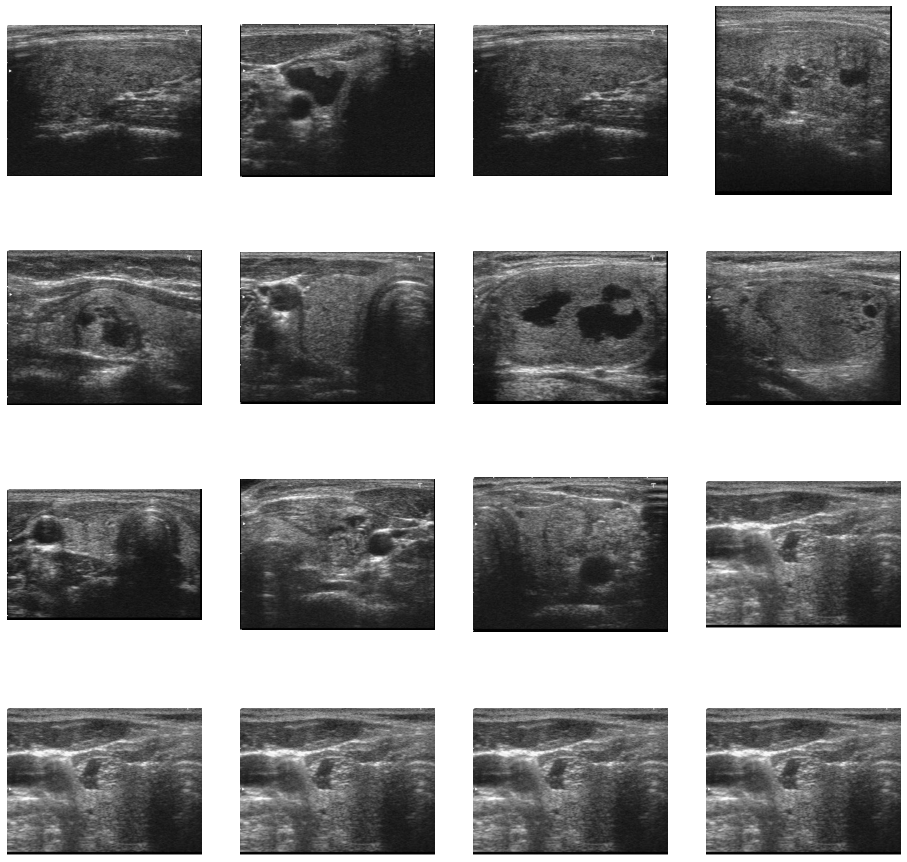

In [5]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_normal_pix = [os.path.join(train_with_dir, fname) 
                for fname in train_with_fnames[pic_index-8:pic_index]]
next_pneumonia_pix = [os.path.join(train_without_dir, fname) 
                for fname in train_without_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_normal_pix+next_pneumonia_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)
  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

In [6]:
from tensorflow.keras import layers
from tensorflow.keras import Model
img_input = layers.Input(shape=(150, 150, 3))
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
output = layers.Dense(1, activation='sigmoid')(x)
model = Model(img_input, output)

In [7]:


# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)

In [8]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)       

In [9]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [10]:


from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [11]:
history=model.fit(train_generator,epochs = 25,validation_data = validation_generator)

Epoch 1/25
10/10 [==============================] - 50s 5s/step - loss: 1.1024 - acc: 0.5500 - val_loss: 0.7308 - val_acc: 0.5000
Epoch 2/25
10/10 [==============================] - 5s 543ms/step - loss: 0.7460 - acc: 0.6350 - val_loss: 0.7112 - val_acc: 0.5000
Epoch 3/25
10/10 [==============================] - 5s 544ms/step - loss: 0.5248 - acc: 0.8200 - val_loss: 0.7742 - val_acc: 0.6700
Epoch 4/25
10/10 [==============================] - 5s 541ms/step - loss: 0.3755 - acc: 0.8350 - val_loss: 0.9409 - val_acc: 0.4500
Epoch 5/25
10/10 [==============================] - 5s 542ms/step - loss: 0.1350 - acc: 0.9600 - val_loss: 1.3174 - val_acc: 0.6800
Epoch 6/25
10/10 [==============================] - 5s 542ms/step - loss: 0.0460 - acc: 0.9850 - val_loss: 1.7168 - val_acc: 0.5900
Epoch 7/25
10/10 [==============================] - 5s 534ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 2.1865 - val_acc: 0.6700
Epoch 8/25
10/10 [==============================] - 5s 540ms/step - loss: 5.07

In [15]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(150,150))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1,150,150, 3)
	# center pixel data
	img = img.astype('float32')
	img = img - [123.68, 116.779, 103.939]
	return img
img = load_image('/content/drive/My Drive/Thyroid Images/Train/M/1.JPG')
# predict the class
result = model.predict(img)
if(result[0]==1):
  print("M")
else:
  print("B")

M


In [16]:
actual=[]
pred=[]
y_pred=[]
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(150,150))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1,150,150, 3)
	# center pixel data
	img = img.astype('float32')
	img = img - [123.68, 116.779, 103.939]
	return img
for i in range(1,51):
  img = load_image('/content/drive/My Drive/Thyroid Images/Test/M/'+str(i)+'.JPG')
  result = model.predict(img)
  if(result[0]==1):
    pred.append(1)
  else:
    pred.append(0)
  y_pred.append(result[0])
  
  actual.append(1)

In [17]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(150,150))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1,150,150, 3)
	# center pixel data
	img = img.astype('float32')
	img = img - [123.68, 116.779, 103.939]
	return img
for i in range(1,51):
  img = load_image('/content/drive/My Drive/Thyroid Images/Test/B/'+str(i)+'.JPG')
  result = model.predict(img)
  if(result[0]==1):
    pred.append(1)
  else:
    pred.append(0)
  y_pred.append(result[0])
  
  actual.append(0)

In [18]:
from sklearn import metrics
print(); print(metrics.classification_report(y_pred,actual))
print(); print(metrics.confusion_matrix(y_pred,actual))
print("Accuracy:  ",metrics.accuracy_score(y_pred,actual))


              precision    recall  f1-score   support

         0.0       0.24      1.00      0.39        12
         1.0       1.00      0.57      0.72        88

    accuracy                           0.62       100
   macro avg       0.62      0.78      0.56       100
weighted avg       0.91      0.62      0.68       100


[[12  0]
 [38 50]]
Accuracy:   0.62


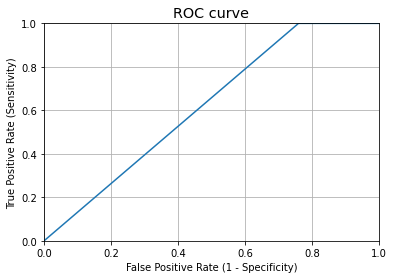

In [19]:
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(actual,pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

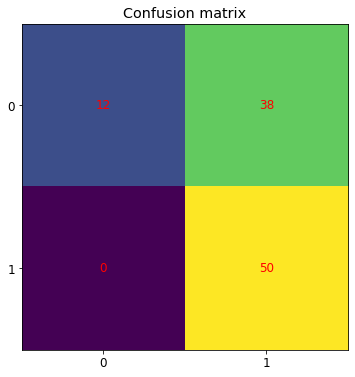

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(actual,pred)
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=(0,1))
ax.yaxis.set(ticks=(0, 1), ticklabels=(0,1))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.title("Confusion matrix")
plt.show()

In [21]:
confusion = metrics.confusion_matrix(actual,pred)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print("classification_error")
print(1 - metrics.accuracy_score(actual,pred))
print("sensitivity")
print(metrics.recall_score(actual,pred))
print("True Positive Rate")
specificity = TN / (TN + FP)

print(specificity)
print("precision")
print(metrics.precision_score(actual,pred))
print("roc_auc_score")
print(metrics.roc_auc_score(actual,pred))
from sklearn.metrics import f1_score
score = f1_score(actual,pred, average='binary')
print('F-Measure: %.3f' % score)

[[12 38]
 [ 0 50]]
classification_error
0.38
sensitivity
1.0
True Positive Rate
0.24
precision
0.5681818181818182
roc_auc_score
0.62
F-Measure: 0.725
